In [1]:
with open('input.txt') as fp:
    data = [list(map(int, s.split(','))) for s in fp.read().splitlines()]

In [4]:
import matplotlib.pyplot as plt

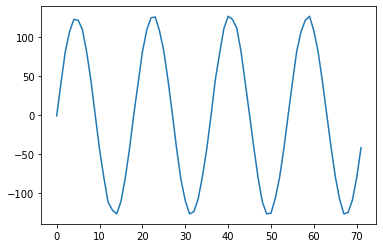

In [5]:
plt.plot(data[0])

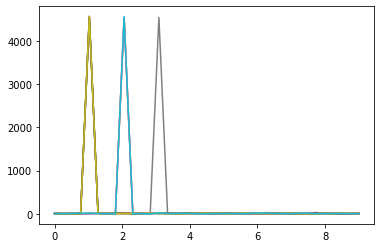

In [42]:
import numpy as np
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)
for i in range(10):
    n = DFT_slow(data[i])
    Fs = len(data[i]) / 0.004
    ys = np.linspace(0, 1, n.shape[0]//2)*(Fs/2)/1000
    plt.plot(ys, np.abs(n[:len(ys)]))

In [49]:
def detect_freq(sig, dt=0.004):
    n = DFT_slow(sig)
    Fs = len(sig) / dt
    ys = np.linspace(0, 1, n.shape[0]//2)*(Fs/2)/1000
    xs = np.abs(n[:len(ys)])
    x, y = max(zip(xs, ys))
    return int(round(y))
fsdata = list(map(detect_freq, data))

In [53]:
all(x == 1 for x in fsdata[0::8]), all(x == 2 for x in fsdata[6::8]), all(x == 3 for x in fsdata[7::8])

(True, True, True)

In [56]:
def decode(xs):
    return sum(((x-1)*(3**i)) for i,x in enumerate(reversed(xs)))
sig = [fsdata[i+1:i+6] for i in range(0, len(fsdata), 8)]
sig = list(map(decode, sig))
bytes(sig)

b'Twas the night before Christmas, when all through the house\nNot a creature was stirring, not even a mouse...\n     \nHappy new year to all Advent of Coders!\n'